<a href="https://colab.research.google.com/github/yunusemravci/ML-Assignments/blob/master/A1_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Data Processing
1. Split the data into features and targets. Binarize the target labels i.e., convert to 0/1.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the training dataset
train_df = pd.read_csv('/content/drive/MyDrive/HW1-ML/Concrete_Quality_Train_Corrupt.csv')
#print(train_df.columns)

# Split into features and targets
X_train = train_df.iloc[:, 1:-1]  # Exclude 'Index' and 'Quality'
y_train = train_df['Concrete Quality']

# Binarize the target labels
binarizer = LabelBinarizer()
y_train = binarizer.fit_transform(y_train).flatten()
y_train


array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

2. Remove NaN and unnecessary columns from the data replacing mean

In [ ]:
# Remove rows or replace NaN values mean
# Here, replacing NaN values with the mean of the column
X_train.fillna(X_train.mean(), inplace=True)

# We can also use the following to replace different types of NaN values like string "NaN", nulls etc.
X_train.replace(["NaN", 'NaT'], np.nan, inplace=True)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train.fillna(0, inplace=True)
X_train

<ipython-input-4-78b988205668>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.fillna(X_train.mean(), inplace=True)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age(days)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
4,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
...,...,...,...,...,...,...,...,...
595,151.6,0.0,111.9,184.4,7.9,992.0,815.9,28
596,153.1,145.0,113.0,178.5,8.0,1001.9,688.7,28
597,299.8,0.0,119.8,211.5,9.9,878.2,727.6,28
598,153.1,145.0,113.0,178.5,8.0,867.2,824.0,28


3. Scale the data using Standard Scaler. Minimum and maximum values are reported of the columns before and after scaling.

In [ ]:
# Report range (min and max) before scaling
print("Before Scaling:")
for column in X_train.columns:
    print(f"{column} - Min: {np.min(X_train[column])}, Max: {np.max(X_train[column])}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Report range (min and max) after scaling
print("\nAfter Scaling:")
for i, column in enumerate(X_train.columns):
    print(f"{column} - Min: {np.min(X_train_scaled[:, i])}, Max: {np.max(X_train_scaled[:, i])}")


Before Scaling:
Cement - Min: 102.0, Max: 540.0
Blast Furnace Slag - Min: 0.0, Max: 359.4
Fly Ash - Min: 0.0, Max: 200.0
Water - Min: 0.0, Max: 228.0
Superplasticizer - Min: 0.0, Max: 32.2
Coarse Aggregate - Min: 0.0, Max: 1145.0
Fine Aggregate - Min: 0.0, Max: 992.6
Age(days) - Min: 1, Max: 365

After Scaling:
Cement - Min: -1.7148201481944876, Max: 2.356559764405957
Blast Furnace Slag - Min: -0.8373935011945018, Max: 3.4170785311114082
Fly Ash - Min: -0.7854520398875391, Max: 2.3608407687444366
Water - Min: -6.980653130562407, Max: 1.99877468420201
Superplasticizer - Min: -0.9901463630274604, Max: 4.091431916966785
Coarse Aggregate - Min: -7.792260253015688, Max: 1.3793197979476748
Fine Aggregate - Min: -8.612638673534361, Max: 2.3858158839491472
Age(days) - Min: -0.687106662066074, Max: 5.565824501533682


# KNN
1. Test data upload and then binarized

In [ ]:
# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/HW1-ML/Concrete_Quality_Test.csv')
X_test = test_df.iloc[:, 1:-1]  # Exclude 'Index' and 'Quality'
y_test = test_df['Concrete Quality']

# Binarize the test labels
y_test = binarizer.transform(y_test).flatten()

# Scale the test features
X_test_scaled = scaler.transform(X_test)
y_test

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

2-3. Report the accuracy or the total number of misclassifications for each value of k on the test data set
Plot the accuracies of the testing data against the k values (i.e 1, 3, 5) with proper labels and title.

For k = 1, Accuracy = 94.74%, Misclassifications = 2
For k = 3, Accuracy = 89.47%, Misclassifications = 4
For k = 5, Accuracy = 89.47%, Misclassifications = 4


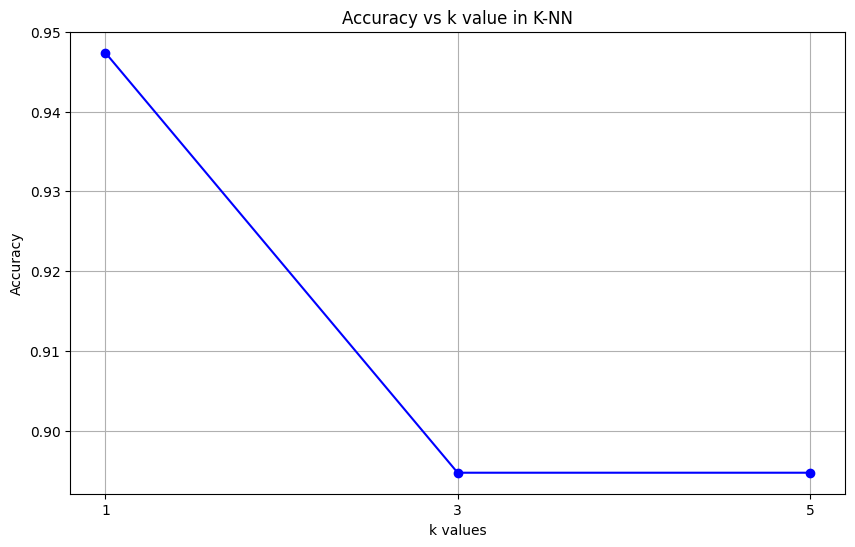

In [ ]:
# k values
k_values = [1, 3, 5]
accuracies = []

# Loop over various k values
for k in k_values:
    # Initialize the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train_scaled, y_train)

    # Predict the labels for test data
    y_pred = knn.predict(X_test_scaled)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Report the total number of misclassifications
    misclassifications = sum(y_test != y_pred)

    print(f"For k = {k}, Accuracy = {accuracy*100:.2f}%, Misclassifications = {misclassifications}")

# Plot Accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k value in K-NN')
plt.xticks(k_values)
plt.grid(True)
plt.show()
